# Gold Layer: Business Aggregates

This notebook demonstrates the Gold layer aggregations:  
**Silver Enriched Data → Business-Ready Analytics Tables**

## Gold Tables (6 total)
1. `agg_monthly_postings` - Posting trends over time by industry
2. `agg_salary_by_role` - Salary benchmarks by role × seniority × industry
3. `agg_industry_demand` - Industry-level KPIs
4. `agg_competition` - Competition metrics by industry × role
5. `agg_top_companies` - Company hiring activity
6. `agg_experience_demand` - Experience requirements by industry

In [1]:
# Setup
import sys
import os

# Add project root to Python path (notebooks run from notebooks/ subdirectory)
sys.path.insert(0, os.path.abspath('..'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from src.etl.sg_jobs_etl import SGJobsETL

# Configure plotting
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Instantiate ETL
etl = SGJobsETL()

## 1. Execute Gold Pipeline

In [2]:
# Run Gold layer aggregation
gold_tables = etl.run_gold()

print(f"\nGold tables generated: {len(gold_tables)}")
for name, df in gold_tables.items():
    print(f"  {name}: {len(df):,} rows × {len(df.columns)} columns")


GOLD LAYER: Business Aggregates
[Gold] Generating agg_monthly_postings...


/Users/overlord/Desktop/DSAI/Module 1/assignment/sg_job_analytics/src/etl/sg_jobs_etl.py:617: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emp_type_agg = df_exploded.groupby(['posting_month', 'industry', 'employmentTypes']).size().unstack(fill_value=0)
/Users/overlord/Desktop/DSAI/Module 1/assignment/sg_job_analytics/src/etl/sg_jobs_etl.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = df_salary.groupby(['role_family', 'seniority_tier', 'primary_industry']).agg({


[Gold] Generating agg_salary_by_role...
[Gold] Generating agg_industry_demand...
[Gold] Generating agg_competition...


/Users/overlord/Desktop/DSAI/Module 1/assignment/sg_job_analytics/src/etl/sg_jobs_etl.py:696: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = df_comp.groupby(['industry', 'role_family']).agg({


[Gold] Generating agg_top_companies...


/Users/overlord/Desktop/DSAI/Module 1/assignment/sg_job_analytics/src/etl/sg_jobs_etl.py:716: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = df.groupby(['postedCompany_name', 'primary_industry']).agg({


[Gold] Generating agg_experience_demand...


/Users/overlord/Desktop/DSAI/Module 1/assignment/sg_job_analytics/src/etl/sg_jobs_etl.py:742: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = df_exploded.groupby(['industry', 'experience_band', 'seniority_tier']).agg({


[Gold]   Saved agg_monthly_postings: 645 rows
[Gold]   Saved agg_salary_by_role: 2,924 rows
[Gold]   Saved agg_industry_demand: 43 rows
[Gold]   Saved agg_competition: 731 rows
[Gold]   Saved agg_top_companies: 2,285,493 rows
[Gold]   Saved agg_experience_demand: 860 rows

✅ Gold layer complete: 6 tables


Gold tables generated: 6
  agg_monthly_postings: 645 rows × 13 columns
  agg_salary_by_role: 2,924 rows × 8 columns
  agg_industry_demand: 43 rows × 7 columns
  agg_competition: 731 rows × 7 columns
  agg_top_companies: 2,285,493 rows × 6 columns
  agg_experience_demand: 860 rows × 5 columns


## 2. Table Previews

### 2.1 Monthly Postings

In [3]:
monthly = gold_tables['agg_monthly_postings']
print(f"Shape: {monthly.shape}")
print(f"\nSample:")
monthly.head(10)

Shape: (645, 13)

Sample:


,posting_month,industry,posting_count,avg_salary,total_vacancies,pct_contract,pct_flexi-work,pct_freelance,pct_full_time,pct_internship_attachment,pct_part_time,pct_permanent,pct_temporary
0,2023-03,Accounting / Auditing / Taxation,780,3977.293967,1907,0.055128,0.000000,0.000000,0.326923,0.008974,0.007692,0.539744,0.061538
1,2023-03,Admin / Secretarial,1159,2936.196164,2791,0.129422,0.000000,0.000000,0.344262,0.003451,0.015531,0.467645,0.039689
2,2023-03,Advertising / Media,165,3882.414110,277,0.078788,0.000000,0.000000,0.393939,0.036364,0.024242,0.460606,0.006061
3,2023-03,Architecture / Interior Design,139,4830.755396,920,0.057554,0.000000,0.000000,0.467626,0.007194,0.007194,0.453237,0.007194
4,2023-03,Banking and Finance,613,7265.160685,1955,0.182708,0.000000,0.004894,0.278956,0.001631,0.006525,0.515498,0.009788
5,2023-03,Building and Construction,785,4654.910714,1483,0.049682,0.000000,0.001274,0.543949,0.001274,0.000000,0.401274,0.002548
6,2023-03,Consulting,374,6145.393048,2699,0.112299,0.000000,0.005348,0.291444,0.010695,0.005348,0.569519,0.005348
7,2023-03,Customer Service,982,3263.595897,3510,0.117108,0.000000,0.002037,0.387984,0.008147,0.035642,0.419552,0.029532
8,2023-03,Design,145,4351.621528,233,0.062069,0.000000,0.000000,0.462069,0.013793,0.013793,0.434483,0.013793
9,2023-03,Education and Training,360,3688.407781,1725,0.158333,0.008333,0.016667,0.422222,0.005556,0.072222,0.308333,0.008333


### 2.2 Salary by Role

In [4]:
salary_by_role = gold_tables['agg_salary_by_role']
print(f"Shape: {salary_by_role.shape}")
print(f"\nSample (sorted by median salary):")
salary_by_role.sort_values('salary_median', ascending=False).head(10)

Shape: (2924, 8)

Sample (sorted by median salary):


,role_family,seniority_tier,industry,n,salary_mean,salary_p25,salary_median,salary_p75
424,Consultant,Management,Sciences / Laboratory / R&D,2,16500.000000,16500.0,16500.0,16500.0
504,Consultant,Senior,Public / Civil Service,1,16250.000000,16250.0,16250.0,16250.0
1871,IT/Systems,Senior,Legal,7,14512.857143,12750.0,15750.0,16170.0
731,Driver,Management,Accounting / Auditing / Taxation,1,15250.000000,15250.0,15250.0,15250.0
1097,Engineer,Management,Legal,3,14416.666667,14000.0,15000.0,15125.0
1787,IT/Systems,Management,Manufacturing,1,14750.000000,14750.0,14750.0,14750.0
919,Education,Management,General Work,1,14250.000000,14250.0,14250.0,14250.0
1110,Engineer,Management,Risk Management,1,14250.000000,14250.0,14250.0,14250.0
2288,Operations,Management,Education and Training,3,11250.000000,9000.0,14250.0,15000.0
2656,Retail/F&B,Management,Real Estate / Property Management,1,14250.000000,14250.0,14250.0,14250.0


In [5]:
salary_by_role.query("role_family == 'Developer'")

,role_family,seniority_tier,industry,n,salary_mean,salary_p25,salary_median,salary_p75
516,Developer,Entry,Accounting / Auditing / Taxation,52,6136.250000,5850.0,5850.0,6600.0
517,Developer,Entry,Admin / Secretarial,20,2472.425000,2200.0,2400.0,2775.0
518,Developer,Entry,Advertising / Media,5,3585.000000,2500.0,3000.0,4100.0
519,Developer,Entry,Architecture / Interior Design,1,3100.000000,3100.0,3100.0,3100.0
520,Developer,Entry,Banking and Finance,78,7828.205128,3750.0,6000.0,14250.0
...,...,...,...,...,...,...,...,...
683,Developer,Senior,Security and Investigation,0,NaN,NaN,NaN,NaN
684,Developer,Senior,Social Services,0,NaN,NaN,NaN,NaN
685,Developer,Senior,Telecommunications,12,9150.000000,6900.0,8250.0,11750.0
686,Developer,Senior,Travel / Tourism,1,7000.000000,7000.0,7000.0,7000.0


### 2.3 Industry Demand

In [6]:
industry_demand = gold_tables['agg_industry_demand']
print(f"Shape: {industry_demand.shape}")
print(f"\nSample (sorted by posting count):")
industry_demand.sort_values('posting_count', ascending=False).head(10)

Shape: (43, 7)

Sample (sorted by posting count):


,industry,posting_count,total_vacancies,avg_applications,avg_views,avg_salary,repost_rate
20,Information Technology,140865,315788,2.51428,27.700316,6817.810306,0.039982
10,Engineering,136371,259201,1.68046,23.945854,4956.232704,0.059925
1,Admin / Secretarial,117849,292047,2.641236,31.501421,3164.870154,0.033721
7,Customer Service,111780,415233,1.750904,23.243872,3489.953163,0.045715
27,Others,106097,298785,1.70526,22.816875,4167.854193,0.055883
36,Sales / Retail,105063,283567,1.386016,18.614098,4272.336243,0.037149
5,Building and Construction,84031,178966,1.841439,28.301436,4646.255509,0.048089
0,Accounting / Auditing / Taxation,78647,164303,2.497692,34.558496,4341.132610,0.033797
14,F&B,73731,308650,0.893396,16.153016,3735.964159,0.046846
23,Logistics / Supply Chain,69193,178866,2.019294,25.452705,3856.615973,0.042259


### 2.4 Competition Metrics

In [7]:
competition = gold_tables['agg_competition']
print(f"Shape: {competition.shape}")
print(f"\nSample (sorted by competition ratio):")
competition.sort_values('competition_ratio_median', ascending=False).head(10)

Shape: (731, 7)

Sample (sorted by competition ratio):


,industry,role_family,posting_count,avg_applications,competition_ratio_median,competition_ratio_p25,competition_ratio_p75
673,Social Services,IT/Systems,4,4.0,2.5,0.0,6.5
495,Precision Engineering,Consultant,2,1.5,1.5,0.75,2.25
79,Banking and Finance,Manager,9497,4.243761,1.0,0.0,1.0
529,Public / Civil Service,Consultant,19,1.842105,1.0,0.0,2.5
256,General Management,Analyst,311,4.064309,1.0,0.0,1.0
657,Security and Investigation,Manager,566,6.904594,1.0,0.0,1.0
661,Security and Investigation,Retail/F&B,13,9.538462,1.0,0.5,9.0
511,Professional Services,Analyst,588,5.314626,1.0,0.0,1.0
81,Banking and Finance,Operations,1527,4.227898,1.0,0.0,1.0
78,Banking and Finance,IT/Systems,415,2.595181,1.0,0.0,1.0


### 2.5 Top Companies

In [8]:
top_companies = gold_tables['agg_top_companies']
print(f"Shape: {top_companies.shape}")
print(f"\nTop 15 companies by posting count:")
top_companies.sort_values('posting_count', ascending=False).head(15)

Shape: (2285493, 6)

Top 15 companies by posting count:


,company,primary_industry,posting_count,avg_salary,repost_rate,avg_vacancies_per_post
1615778,RECRUITPEDIA PTE. LTD.,Engineering,9249,5045.091361,0.000108,1.068115
1615768,RECRUITPEDIA PTE. LTD.,Accounting / Auditing / Taxation,8574,4193.658153,0.000000,5.851295
2011679,THE SUPREME HR ADVISORY PTE. LTD.,Engineering,7496,4021.084602,0.007337,1.210379
1615769,RECRUITPEDIA PTE. LTD.,Admin / Secretarial,7220,2720.048476,0.000000,1.549446
1614909,RECRUIT EXPRESS PTE LTD,Admin / Secretarial,7150,2968.563627,0.005874,3.768951
2011670,THE SUPREME HR ADVISORY PTE. LTD.,Admin / Secretarial,6900,2795.035911,0.007536,1.372899
1614925,RECRUIT EXPRESS PTE LTD,Healthcare / Pharmaceutical,6704,3388.219959,0.004773,6.043705
2011669,THE SUPREME HR ADVISORY PTE. LTD.,Accounting / Auditing / Taxation,5775,3571.576737,0.011082,1.263203
1615791,RECRUITPEDIA PTE. LTD.,Logistics / Supply Chain,5773,4580.820197,0.000173,1.112766
2011678,THE SUPREME HR ADVISORY PTE. LTD.,Education and Training,4751,3327.243522,0.012418,2.116607


### 2.6 Experience Demand

In [9]:
experience_demand = gold_tables['agg_experience_demand']
print(f"Shape: {experience_demand.shape}")
print(f"\nSample:")
experience_demand.head(10)

Shape: (860, 5)

Sample:


,industry,experience_band,seniority_tier,posting_count,avg_salary
0,Accounting / Auditing / Taxation,0-1 yr,Entry,8334,2599.257897
1,Accounting / Auditing / Taxation,0-1 yr,Management,338,5083.521084
2,Accounting / Auditing / Taxation,0-1 yr,Mid,15752,3157.675609
3,Accounting / Auditing / Taxation,0-1 yr,Senior,874,3869.245392
4,Accounting / Auditing / Taxation,10+ yrs,Entry,14,5310.714286
5,Accounting / Auditing / Taxation,10+ yrs,Management,526,13002.502935
6,Accounting / Auditing / Taxation,10+ yrs,Mid,7,5278.571429
7,Accounting / Auditing / Taxation,10+ yrs,Senior,52,12910.576923
8,Accounting / Auditing / Taxation,2-3 yrs,Entry,1801,3052.032998
9,Accounting / Auditing / Taxation,2-3 yrs,Management,2261,5565.322365


## 3. Validation Visualizations

### 3.1 Monthly Posting Trends

In [10]:
# Top 5 industries over time
top5_industries = industry_demand.nlargest(5, 'posting_count')['industry'].tolist()
monthly_top5 = monthly[monthly['industry'].isin(top5_industries)]
monthly_top5['posting_month'] = monthly_top5['posting_month'].astype(str)

fig = px.line(monthly_top5, x='posting_month', y='posting_count', color='industry',
              title='Monthly Posting Trends - Top 5 Industries',
              labels={'posting_month': 'Month', 'posting_count': 'Number of Postings'},
              markers=True)
fig.update_layout(height=500)
fig.show()

/var/folders/89/5xh0rg2131nc0cmrcfsqqvqw0000gn/T/ipykernel_61614/2106958505.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_top5['posting_month'] = monthly_top5['posting_month'].astype(str)


### 3.2 Salary by Role Family

In [11]:
# Aggregate salary by role family (across all seniorities)
role_salary = salary_by_role.groupby('role_family').agg({
    'salary_median': 'median',
    'n': 'sum'
}).reset_index()

# Filter roles with at least 100 postings
role_salary_filtered = role_salary[role_salary['n'] >= 100].sort_values('salary_median', ascending=True)

fig = px.bar(role_salary_filtered, x='salary_median', y='role_family', orientation='h',
             title='Median Salary by Role Family (Min 100 postings)',
             labels={'salary_median': 'Median Salary (SGD/month)', 'role_family': 'Role Family'})
fig.update_layout(height=600)
fig.show()

/var/folders/89/5xh0rg2131nc0cmrcfsqqvqw0000gn/T/ipykernel_61614/3398181423.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### 3.3 Industry Demand Ranking

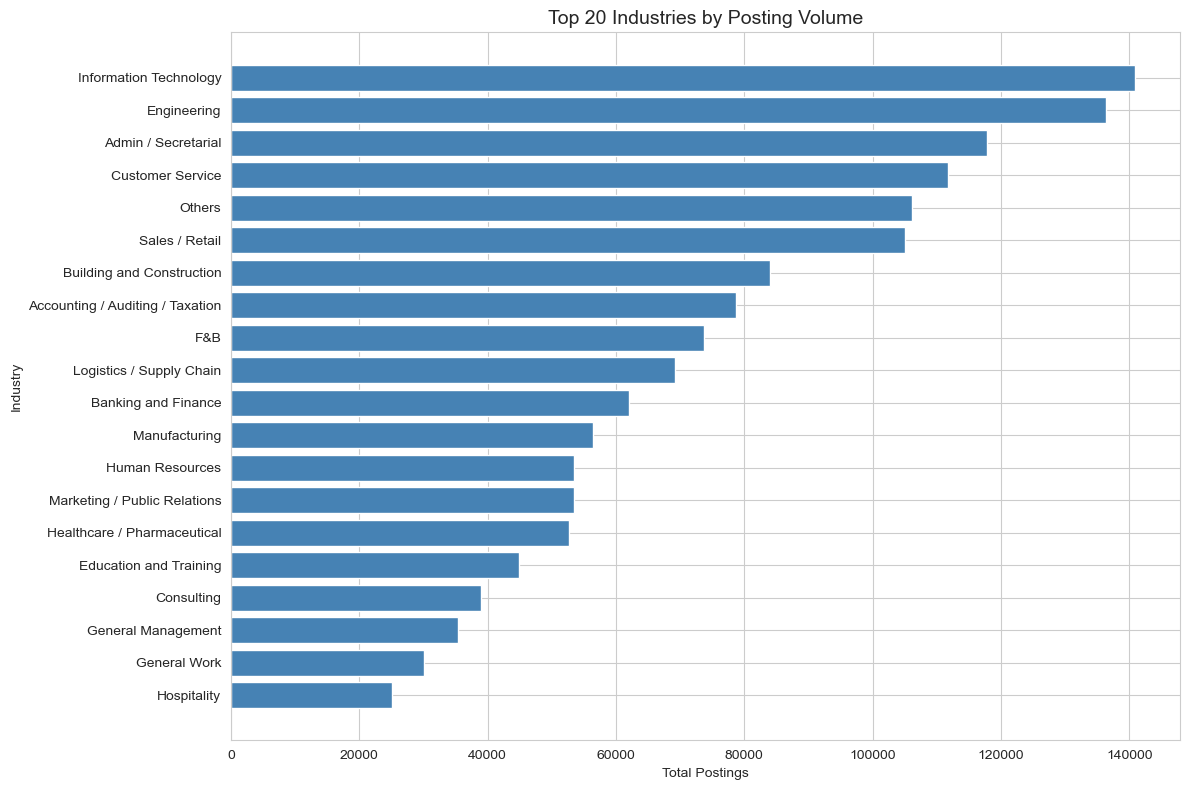

In [12]:
# Top 20 industries by demand
top20_demand = industry_demand.nlargest(20, 'posting_count')

plt.figure(figsize=(12, 8))
plt.barh(top20_demand['industry'], top20_demand['posting_count'], color='steelblue')
plt.xlabel('Total Postings')
plt.ylabel('Industry')
plt.title('Top 20 Industries by Posting Volume', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### 3.4 Top Companies Hiring

In [13]:
# Top 15 companies by posting count (with salary coloring)
top15_companies = top_companies.nlargest(15, 'posting_count')

fig = px.bar(top15_companies, x='posting_count', y='company', orientation='h',
             color='avg_salary',
             title='Top 15 Hiring Companies (Colored by Avg Salary)',
             labels={'posting_count': 'Number of Postings', 'company': 'Company', 'avg_salary': 'Avg Salary'},
             color_continuous_scale='Viridis')
fig.update_layout(height=600, yaxis={'categoryorder':'total ascending'})
fig.show()

### 3.5 Competition Ratio Distribution

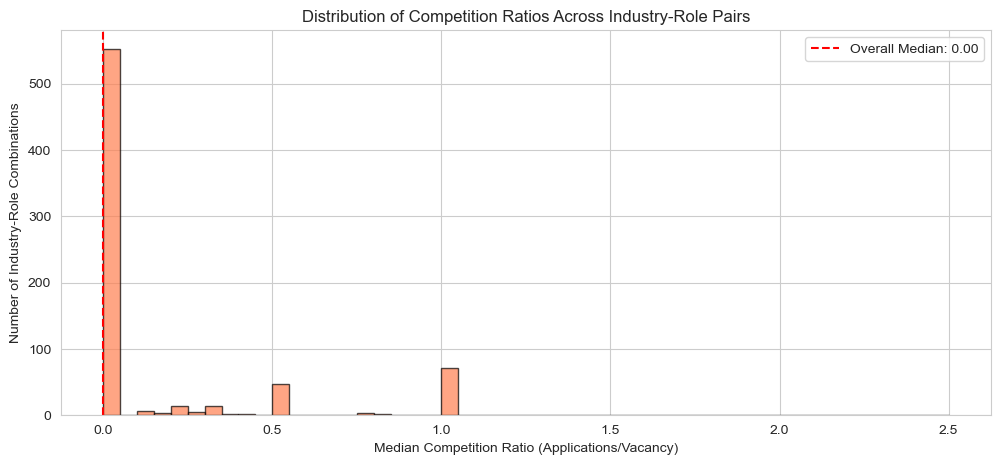

In [14]:
# Histogram of competition ratios
plt.figure(figsize=(12, 5))
competition['competition_ratio_median'].hist(bins=50, edgecolor='black', alpha=0.7, color='coral')
plt.xlabel('Median Competition Ratio (Applications/Vacancy)')
plt.ylabel('Number of Industry-Role Combinations')
plt.title('Distribution of Competition Ratios Across Industry-Role Pairs')
plt.axvline(competition['competition_ratio_median'].median(), color='red', linestyle='--',
            label=f'Overall Median: {competition["competition_ratio_median"].median():.2f}')
plt.legend()
plt.show()

## 4. Pipeline Summary

In [15]:
# Complete pipeline summary
summary = etl.pipeline_summary()


PIPELINE SUMMARY
Bronze rows: 1,044,587
Silver rows: 1,044,587
Gold tables: 6
Bronze → Silver loss: 0.00%

Gold tables:
  - agg_monthly_postings: 645 rows
  - agg_experience_demand: 860 rows
  - agg_salary_by_role: 2,924 rows
  - agg_industry_demand: 43 rows
  - agg_top_companies: 2,285,493 rows
  - agg_competition: 731 rows



## Key Takeaways

✅ **Gold layer successfully created**  
✅ **6 business-ready tables** generated  
✅ **Monthly trends** aggregated by industry  
✅ **Salary benchmarks** by role × seniority × industry  
✅ **Industry KPIs** computed (demand, competition, repost rates)  
✅ **Company rankings** by hiring activity  
✅ **Experience requirements** mapped across industries

**Data Quality:**
- Bronze → Silver: 0% row loss (all rows enriched)
- All 6 Gold tables validated
- Ready for dashboard consumption

**Next:** Build Streamlit dashboard using Gold tables